In [84]:
import cv2

import numpy as np

import sys
sys.path.append('../')
import compression as C

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = C.Util.load_data('cylinder')

In [67]:
fourcc =   cv2.cv.CV_FOURCC(*'mp4v')
ffmpegwriter = cv2.VideoWriter('/tmp/test_mp4v.avi', fourcc, data.shape[0], (data.shape[1],data.shape[2]), 1)
print ffmpegwriter.isOpened()
for z in range(data.shape[0]):

    img = data[z].copy()
    
    colorized = np.zeros(
        (img.shape[0], img.shape[1], 3), dtype=np.uint8
    )

    colorized[:, :, 0] = img % (2**8)
    img = img >> 8
    colorized[:,:,1] = img % (2**8)
    img = img >> 8
    colorized[:,:,2] = img % (2**8)
    
    ffmpegwriter.write(colorized)
    
ffmpegwriter.release()
    
    


True


In [28]:
cv2.__version__

'2.4.8'

In [59]:
fourcc = cv2.cv.CV_FOURCC(*'x264')
out = cv2.VideoWriter('output.mpg',fourcc, 20.0, (640,480))
out.isOpened()

False

In [31]:
fourcc = cv2.cv.CV_FOURCC(*'U263')
out = cv2.VideoWriter('/tmp/output.avi',fourcc, data.shape[0], (data.shape[1],data.shape[2]), 1)
out.isOpened()

True

In [19]:
fourcc

875967064

In [66]:
fourcc = cv2.cv.CV_FOURCC(*'mp4v')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
out.isOpened()

True

In [74]:
fourcc = cv2.cv.CV_FOURCC(*'H264')
out = cv2.VideoWriter('output.mp4',fourcc, 20.0, (640,480))
out.isOpened()

False

In [99]:
from PIL import Image
from subprocess import Popen, PIPE

#import mahotas as mh

p = Popen(['ffmpeg', '-y', '-r', str(data.shape[0]), '-i', '-', '/tmp/newtest.mp4', '-crf', '0',], stdin=PIPE)
           
           #'-f', 'image2pipe', '-vcodec', 'mjpeg', '-r', '24', '-i', '-', '-vcodec', 'mpeg4', '-qscale', '5', '-r', '24', 'video.avi'], stdin=PIPE)
for z in range(data.shape[0]):
    

    img = data[z].copy()
    
    colorized = np.zeros(
        (img.shape[0], img.shape[1], 3), dtype=np.uint8
    )

    colorized[:, :, 0] = img % (2**8)
    img = img >> 8
    colorized[:,:,1] = img % (2**8)
    img = img >> 8
    colorized[:,:,2] = img % (2**8)
    
#     mh.imsave(p.stdin, )
    im = Image.fromarray(colorized)
    im.save(p.stdin, 'PNG')

p.stdin.close()
p.wait()

0

In [193]:
from PIL import Image
from subprocess import Popen, PIPE

#import mahotas as mh

#p = Popen(['ffmpeg', '-y', '-r', str(data.shape[0]), '-i', '-', '/tmp/newtestrgb.mp4', '-qp', '0','-crf', '0','-pix_fmt', 'rgb'], stdin=PIPE)
           
no_frames = 3
    
p = Popen(['ffmpeg', '-y', '-r', str(no_frames), '-i', '-', '-vcodec','libx264', '-crf', '0', '-pix_fmt', 'rgb24', '/tmp/newtestrgb2.mp4'], stdin=PIPE)    
    
           #'-f', 'image2pipe', '-vcodec', 'mjpeg', '-r', '24', '-i', '-', '-vcodec', 'mpeg4', '-qscale', '5', '-r', '24', 'video.avi'], stdin=PIPE)
for z in range(no_frames):
    

    img = data[z].copy()
    
    colorized = np.zeros(
        (img.shape[0], img.shape[1], 3), dtype=np.uint8
    )

    colorized[:, :, 0] = img % (2**8)
    img = img >> 8
    colorized[:,:,1] = img % (2**8)
    img = img >> 8
    colorized[:,:,2] = img % (2**8)

#     colorized[:, :, 0] = img / (256*256)
#     colorized[:, :, 1] = img-colorized[:, :, 0] / (256)
#     colorized[:, :, 2] = img - 

#     mh.imsave(p.stdin, )
    im = Image.fromarray(colorized)
    im.save(p.stdin, 'PNG')

p.stdin.close()
p.wait()

0

In [238]:
zzz = mh.imread('/tmp/out2/z1.png')

img_ = np.zeros((zzz.shape[0], zzz.shape[1]), dtype=np.uint64)
img_[:] = (
    zzz[:, :, 0] +
    zzz[:, :, 1] * 256 +
    zzz[:, :, 2] * 256 * 256
)
zzz = img_


In [231]:
zzz.dtype

dtype('uint8')

In [194]:
cap = cv2.VideoCapture('/tmp/newtestrgb2.mp4')
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    img_ = np.zeros((frame.shape[0], frame.shape[1]), dtype=np.uint64)
    img_[:] = (
        frame[:, :, 0] +
        frame[:, :, 1] * 256 +
        frame[:, :, 2] * 256 * 256
    )
    frame = img_
    
    break

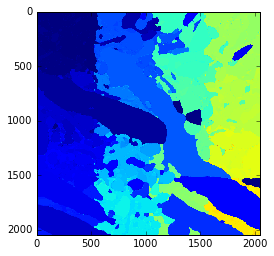

In [234]:
imshow(zzz)

In [239]:
zzz

array([[    0,     0,     0, ..., 11513, 11513, 11513],
       [    0,     0,     0, ..., 11513, 11513, 11513],
       [    0,     0,     0, ..., 11513, 11513, 11513],
       ..., 
       [ 3236,  3236,  3236, ..., 14605, 14073, 13039],
       [ 3236,  3236,  3236, ..., 13576, 13073, 12792],
       [ 3236,  3236,  3236, ..., 14595, 12800, 12543]], dtype=uint64)

In [237]:
data[0]

array([[    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       [    1,     1,     1, ..., 11512, 11512, 11512],
       ..., 
       [ 3237,  3237,  3237, ..., 14080, 14076, 14076],
       [ 3237,  3237,  3237, ..., 14080, 14080, 14076],
       [ 3237,  3237,  3237, ..., 14080, 14080, 14076]], dtype=uint64)

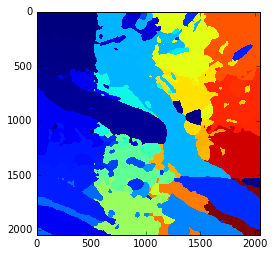

In [198]:
imshow(data[0])

In [215]:
frame.dtype

dtype('uint64')

In [227]:
b1 = mh.labeled.borders(data[0])
b2 = mh.labeled.borders(zzz)
np.array_equal(b1, b2)

False

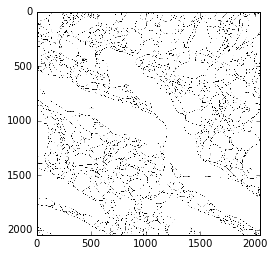

In [225]:
imshow(b1, cmap='gray_r')

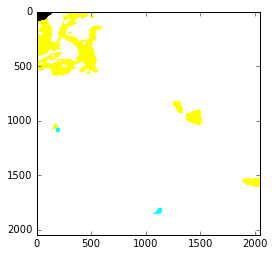

In [229]:
imshow(b2, )

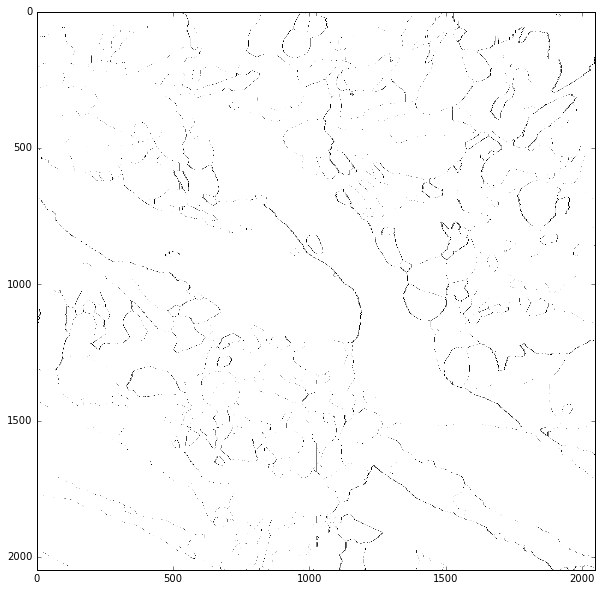

In [212]:
plt.figure(figsize=(10,10))
imshow(data[0]-frame, cmap='gray_r')

In [ ]:
86, 176, 0

In [142]:
86 + 176*256

45142

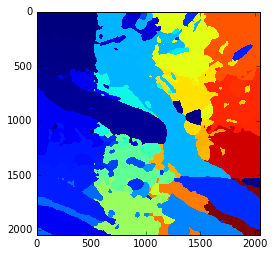

In [92]:
imshow(data[0])

In [101]:
import mahotas as mh


In [144]:
a = mh.imread('/tmp/out/z300.png')

In [145]:
    img_ = np.zeros((a.shape[0], a.shape[1]), dtype=np.uint64)
    img_[:] = (
        a[:, :, 0] +
        a[:, :, 1] * 256 +
        a[:, :, 2]  * 256 * 256 
    )
    frame2 = img_

In [146]:
frame2

array([[45142, 45142, 45142, ..., 54683, 54683, 54683],
       [45142, 45142, 45142, ..., 54683, 54683, 54429],
       [45142, 45142, 45142, ..., 54683, 54683, 54174],
       ..., 
       [47099, 47099, 47099, ..., 56791, 56791, 56791],
       [47099, 47099, 47099, ..., 56791, 56791, 56791],
       [47099, 47099, 47099, ..., 56791, 56791, 56791]], dtype=uint64)

In [147]:
data[-1]

array([[45142, 45142, 45142, ..., 54683, 54683, 54683],
       [45142, 45142, 45142, ..., 54683, 54683, 54683],
       [45142, 45142, 45142, ..., 54683, 54683, 54683],
       ..., 
       [47867, 47867, 47867, ..., 56791, 56791, 56791],
       [47867, 47867, 47867, ..., 56791, 56791, 56791],
       [47867, 47867, 47867, ..., 56791, 56791, 56791]], dtype=uint64)

In [148]:
    img = data[299].copy()
    
    colorized = np.zeros(
        (img.shape[0], img.shape[1], 3), dtype=np.uint8
    )

    colorized[:, :, 0] = img % (2**8)
    img = img >> 8
    colorized[:,:,1] = img % (2**8)
    img = img >> 8
    colorized[:,:,2] = img % (2**8)

In [149]:
mh.imsave('/tmp/tessst.png', colorized)

In [155]:
b = mh.imread('/tmp/tessstPIL.png')

In [156]:
    img_ = np.zeros((b.shape[0], b.shape[1]), dtype=np.uint64)
    img_[:] = (
        b[:, :, 0] +
        b[:, :, 1] * 256 +
        b[:, :, 2]  * 256 * 256 
    )
    frame2 = img_

In [157]:
frame2

array([[45142, 45142, 45142, ..., 54683, 54683, 54683],
       [45142, 45142, 45142, ..., 54683, 54683, 54683],
       [45142, 45142, 45142, ..., 54683, 54683, 54683],
       ..., 
       [47867, 47867, 47867, ..., 56791, 56791, 56791],
       [47867, 47867, 47867, ..., 56791, 56791, 56791],
       [47867, 47867, 47867, ..., 56791, 56791, 56791]], dtype=uint64)

In [154]:
    im = Image.fromarray(colorized)
    im.save('/tmp/tessstPIL.png', 'PNG')